In [1]:
import cv2 
import numpy as 
import skimage.transform
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


ModuleNotFoundError: No module named 'cv2'

Paso 2: Cargar Set de Imágenes

In [ ]:
# Definir dimensiones a las que se redimensionarán todas las imágenes
target_height = 60
target_width = 60

# Leer una imagen específica
img = cv2.imread('C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img/Inundaciones/frame_2.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Ruta al directorio de imágenes
dirname = os.path.join(os.getcwd(),'C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img')
imgpath = dirname + os.sep 

# Inicializar listas para imágenes, directorios y contadores
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("Leyendo imágenes de ", imgpath)

# Recorrer el directorio de imágenes y cargar las imágenes
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant = cant + 1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if len(image.shape) == 3:
                # Redimensionar la imagen
                image_resized = cv2.resize(image, (target_width, target_height))
                images.append(image_resized)
            b = "Leyendo..." + str(cant)
            print(b, end="\r")
            if prevRoot != root:
                print(root, cant)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0
dircount.append(cant)
dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio", dircount)
print('Suma Total de imágenes en subdirs:', sum(dircount))


<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:25: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Antonio\AppData\Local\Temp\ipykernel_12112\344321562.py:25: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


60 60 3 3
Leyendo imágenes de  C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Armas 1
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Asalto 1613
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Incendios 929
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Inundaciones 4525
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Tornados 1210
Directorios leídos: 5
Imágenes en cada directorio [1614, 929, 4525, 1210, 1894]
Suma Total de imágenes en subdirs: 10172


Paso 3: Crear las Etiquetas

In [ ]:
# Crear etiquetas para las imágenes
labels = []
indice = 0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice = indice + 1
print("Cantidad de etiquetas creadas: ", len(labels))

# Obtener nombres de los directorios (categorías)
deportes = []
indice = 0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice, name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice = indice + 1

y = np.array(labels)
X = np.array(images, dtype=np.uint8)


Cantidad de etiquetas creadas:  10172
0 Armas
1 Asalto
2 Incendios
3 Inundaciones
4 Tornados


Paso 4: Crear Set de Entrenamiento y Test

In [ ]:
# Dividir las imágenes en sets de entrenamiento y test
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


Paso 5: Hacemos el One-Hot Encoding para la Red

In [ ]:
# Convertir las etiquetas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


Paso 6: Creación del Set de Entrenamiento y Validación

In [ ]:
# Dividir el set de entrenamiento en entrenamiento y validación
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

# Número de clases
nClasses = len(deportes)


Paso 7: Creación del Modelo CNN


In [ ]:
# Parámetros de entrenamiento
INIT_LR = 1e-3
epochs = 20
batch_size = 64

# Construcción del modelo
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(target_height, target_width, 3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()

# Compilación del modelo
INIT_LR = 1e-3
optimizer = tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100)
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])


c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       921,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 922,693 (3.52 MB)

 Trainable params: 922,693 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Paso 8: Entrenamiento del Modelo para Clasificar las Imágenes

In [ ]:
# Entrenamiento del modelo
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

# Guardar el modelo
sport_model.save("C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/ccn.h5")


Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3635 - loss: 1.4951 - val_accuracy: 0.6456 - val_loss: 1.1272
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6031 - loss: 1.1464 - val_accuracy: 0.7414 - val_loss: 0.8389
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6962 - loss: 0.9374 - val_accuracy: 0.8575 - val_loss: 0.6345
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7525 - loss: 0.8038 - val_accuracy: 0.8802 - val_loss: 0.5086
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7904 - loss: 0.6689 - val_accuracy: 0.8956 - val_loss: 0.4201
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8218 - loss: 0.6000 - val_accuracy: 0.9109 - val_loss: 0.3654
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8471 - loss: 0.5264 - val_accuracy: 0.9398 - val_loss: 0.3246
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8496 - loss: 0.5041 - val_accu

Paso 9: Evaluación de la Red

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9776 - loss: 0.1267
Test loss: 0.13960117101669312
Test accuracy: 0.9729729890823364


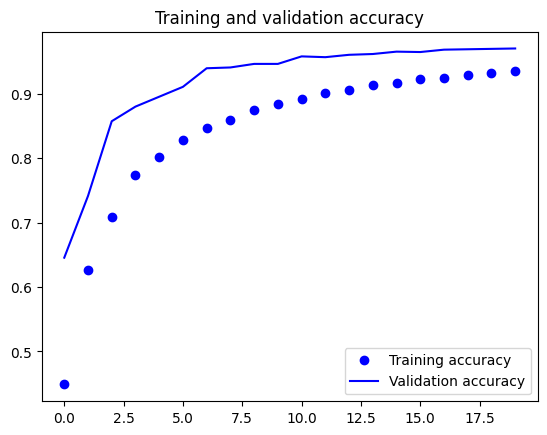

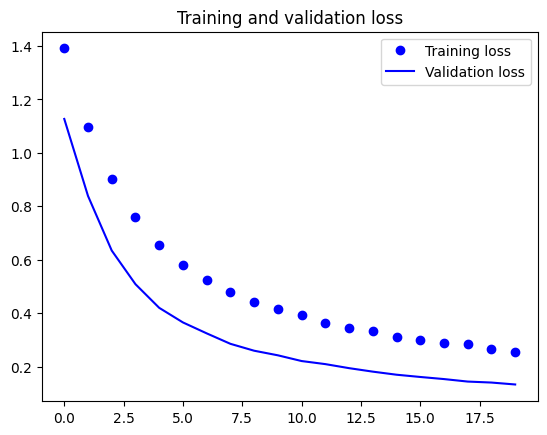

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


((2035,), (2035,))

In [ ]:
# Evaluar el modelo en el set de test
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

sport_train.history

# Graficar la precisión y pérdida del entrenamiento y la validación
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




Paso 10: Aprendemos de los Errores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Found 866 correct labels


IndexError: index 3 is out of bounds for axis 0 with size 1

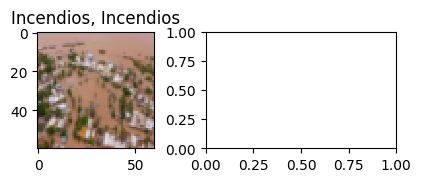

In [ ]:
# Predicciones del modelo en el set de test
predicted_classes2 = sport_model.predict(test_X)

predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape, test_Y.shape

correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()
    
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()
    
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

# Reporte de clasificación

from skimage.transform import resize

# Cargamos y preprocesamos la imagen
images = []
filenames = ['C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/View/i2.jpg']

for filepath in filenames:
    image = plt.imread(filepath, 0)
    image_resized = resize(image, (60, 60), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

# Convertimos las imágenes a un numpy array y normalizamos
X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32') / 255.

# Realizamos la predicción con el modelo
predicted_classes = sport_model.predict(test_X)

# Mostramos la predicción de la imagen
for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[np.argmax(img_tagged)])
